In [1]:
# USE THIS to make full-width cells
from IPython.core.display import display, HTML
import IPython as IPy
# import tabulate
display(HTML("<style>.container { width:100% !important; }</style>"))

# (bstudent) marginal notebook for notes, derivations, and demos

## For ageron handson-ml2 book & website

These are my equivalent of scribbling in the margins of a math book.

### A note on equations: 

E-book editions of this book tend to have misrendered equations.



**See: ageron's included notebook `book_equations.ipynb` for correctly-rendered equations.**

### (bstudent) (ch 05) Examine the Dual form of the SVM objective and its use in the solution

#### Start from Eq 5-6 and 5-7 in ageron handson-ml2:

**Equation 5-6: Dual form of the linear SVM objective**  
$
\begin{split}
\underset{\mathbf{\alpha}}{\operatorname{minimize}}
\dfrac{1}{2}\sum\limits_{i=1}^{m}{
  \sum\limits_{j=1}^{m}{
  \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
  }
} \quad - \quad \sum\limits_{i=1}^{m}{\alpha^{(i)}}\\
\text{subject to}\quad \alpha^{(i)} \ge 0 \quad \text{for }i = 1, 2, \dots, m
\end{split}
$


**Equation 5-7: From the dual solution to the primal solution**  
$
\begin{split}
&\hat{\mathbf{w}} = \sum_{i=1}^{m}{\hat{\alpha}}^{(i)}t^{(i)}\mathbf{x}^{(i)}\\
&\hat{b} = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(t^{(i)} - ({\hat{\mathbf{w}}}^T \mathbf{x}^{(i)})\right)}
\end{split}
$

#### Now examine the quadratic summation term in 5-6:

* Let $\mathbf X$ be the $m\times p$ matrix whose rows are the transposed training samples ${\mathbf{x}^{(i)}}^T$.  
* Let $\mathbf Z$ be the $m\times p$ matrix whose rows are the scalars $t^{i)}$ multiplied by the corresponding transposed training samples ${\mathbf{x}^{(i)}}^T$.  

Now **Eq 5-6** can be stated in vector-matrix format:

$\begin{split}
\underset{\mathbf{\alpha}}{\operatorname{minimize}}\dfrac{1}{2} \mathbf{\alpha}^T \mathbf Z \mathbf Z^T \mathbf{\alpha} - \mathbf 1^T \mathbf{\alpha}\\
\text{subject to}\quad \mathbf \alpha \ge \mathbf 0
\end{split}$  

Where $\mathbf \alpha \ge \mathbf 0$ represents a vector inequality wrt the $m$-vector $\mathbf 0$  

And equation **5-7** becomes:  

$\mathbf w = \mathbf{\alpha}^T \mathbf Z$  

and $b$ has the property of omitting indices where $\alpha^{(i)}=0$:   

$b = \frac{1}{\mathbf 1^T \operatorname{sgn}(\mathbf\alpha)} \operatorname{sgn}(\mathbf\alpha)^T \left( \mathbf t - \mathbf X \mathbf w \right)$

where $\operatorname{sgn}(\mathbf\alpha)$ gives a vector result the same shape as $\mathbf\alpha$ with value one where $\mathbf\alpha^{(i)} > 0$ and value zero where $\mathbf\alpha^{(i)} = 0$ (recall $\mathbf\alpha^{(i)}$ has no negative values, so although the sgn function takes on -1 for negative values, there are none here).

Note that this is mostly conceptual, since the problem above is posed for a *linear* SVM, and $\mathbf w$ becomes problematic when the kernel trick is applied - see **Eq 5-12** and **Eq 5-13**.

### (bstudent) (ch 05) SVM & Kernel Trick Notes

There's a description of *the kernel trick* in the Wikipedia article on *Kernel Methods* (the Wikipedia article on SVM also describes the kernel trick but IMO is not very helpful).

#### Original article here:  https://en.wikipedia.org/wiki/Kernel_method

-----------------
***Excerpt:***

> The kernel trick avoids the explicit mapping that is needed to get linear learning algorithms to learn a nonlinear function or decision boundary. For all $\mathbf {x}$ and $\mathbf {x'}$ in the input space $\mathcal {X}$, certain functions $k(\mathbf {x} ,\mathbf {x'} )$ can be expressed as an inner product in another space $\mathcal {V}$.

> The function $k\colon \mathcal {X} \times \mathcal {X} \to \mathbb {R}$  is often referred to as a kernel or a kernel function. The word "kernel" is used in mathematics to denote a weighting function for a weighted sum or integral.

> Certain problems in machine learning have more structure than an arbitrary weighting function $k$. The computation is made much simpler if the kernel can be written in the form of a "feature map" $\varphi \colon \mathcal {X} \to \mathcal {V}$ which satisfies:  

> * $k(\mathbf {x} ,\mathbf {x'} )=\langle \varphi (\mathbf {x} ),\varphi (\mathbf {x'} )\rangle _{\mathcal {V}}$

> **(bstudent paraphrasing here):** The article goes on to explain that $k(\mathbf {x},\mathbf {x'} )$ is a *similarity function* on vectors $\mathbf {x} \in \mathcal{X}$, which at its simplest might be a straight inner product, a correlation matrix or covariance matrix (must be positive-definite).  Most generally $k(\mathbf {x},\mathbf {x'} )$ is a function that takes two vectors and returns a scalar representing similarity on a larger-is-closer basis.  Note that similarity is in many ways a dual to the concept of a metric (which itself is a generalization of distance), but metrics have a smaller-is-closer representation where metric $d$ always has the property $d(\mathbf x, \mathbf x)=0$. 

-----------------

#### (bstudent) *My commentary and interpretation  on the wiki article:*

This means that the function $\varphi (\mathbf {x})$ is a ***non-linear mapping*** of the $p$-dimensional vector $\mathbf {x}$ to a (generally) higher-dimensional $m$-vector $\mathbf {v}$ (*see footnote$^1$*).  Then $k(\mathbf {x} ,\mathbf {x'} ) = \mathbf v^T \mathbf v'$, where the function mapping from $\mathbf {x}$ to $\mathbf {v}$, $\mathbf v = \varphi (\mathbf {x})$, can be nonlinear and quite convoluted.  

In the vector case, we can view the nonlinear mapping $\varphi (\mathbf {x})$ as producing a not-quite arbitrary $p$-manifold embedded in the higher $m$-dimensional space.  It is not arbitrary because of the above relation:  

$k(\mathbf {x} ,\mathbf {x'} )=\langle \varphi (\mathbf {x} ),\varphi (\mathbf {x'} )\rangle _{\mathcal {V}}$  

For the vector case this reduces to:  

$k(\mathbf {x} ,\mathbf {x'} )=\langle \varphi (\mathbf {x} ),\varphi (\mathbf {x'} )\rangle _{\mathcal {V}}$  

This constraint says that although $\varphi (\mathbf {x})$ may be nonlinear, 
  
***The kernel trick is a "trick" in the sense that (e.g. for algorithms like SVM) the formula for $\varphi (\mathbf {x})$ need not be explicitly specified when kernel function $k(\mathbf {x}, \mathbf {x}')$ satisfies Mercer's condition on $\mathbf {x}$.***

#### About *Mercer's condition* (see https://en.wikipedia.org/wiki/Mercer%27s_theorem#Mercer's_condition): 
The "trick" of the *kernel trick* requires that $k(\mathbf {x} ,\mathbf {x'})$ satisfy *Mercer's condition*.  Mercer's condition is exactly a generalization of positive-definiteness to function spaces, where positive-definite $m$-matrices $\mathbf K \in \mathbb S_{++}^m$ are a special case of Mercer's condition in vector spaces, i.e. $k(\mathbf {x} ,\mathbf {x}) > 0\text{,  } \forall \mathbf x \neq \mathbf 0$.

#### SEE ALSO:
There are some great summarizations and interpretations of SVM kernel methods in ***Deep Learning*** by Goodfellow et al, pp 138-139.

> **Footnotes**:  
> $^1$ More generally, $\varphi (\mathbf {x})$ can map to an infinite-dimensional function space, but to clarify the concept let's "keep it simple" and presume that $\varphi (\mathbf {x})$ maps $\mathbf x$ to $m$-vector $\mathbf v$.   

### (bstudent) (ch 04) Deriving Normal Equation and Gradient for Descent:

$\hat\theta = \displaystyle\min_{\theta} \frac{1}{N} \mathbf{\epsilon}^T\mathbf{\epsilon}$  
  
$\hat\theta = \displaystyle\min_{\theta} \frac{1}{N} (\mathbf{\hat y} - \mathbf{y})^T (\mathbf{\hat y} - \mathbf{y})$  
  
$\mathbf{\hat y} = \mathbf{X}\mathbf{\theta}$

$\implies \nabla_\theta \frac{1}{N} (\mathbf{X}\mathbf{\theta}-\mathbf{y})^T(\mathbf{X}\mathbf{\theta}-\mathbf{y}) = \mathbf{0}$  

Minimum occurs where:  

$\nabla_\theta \frac{1}{N} (\mathbf{X}\mathbf{\theta}-\mathbf{y})^T(\mathbf{X}\mathbf{\theta}-\mathbf{y}) = \frac{1}{N} \left( 2 \mathbf{X}^T\mathbf{X}\mathbf{\theta} - 2 \mathbf{X}^T\mathbf{y}\right) = \mathbf{0}$  

$\implies \mathbf{X}^T\mathbf{X}\hat\theta = \mathbf{X}^T\mathbf{y}$  

$\implies \hat\theta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$  
(The "normal equation")  

For general gradient at points other than $\hat\theta$, the "gradient" in MSE gradient descent is:    

$\nabla_\theta \frac{1}{N} \left(\mathbf{X}\mathbf{\theta}-\mathbf{y})^T(\mathbf{X}\mathbf{\theta}-\mathbf{y}\right) = \frac{2}{N} \mathbf{X}^T \left(\mathbf{X}\mathbf{\theta} - \mathbf{y} \right)$

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Used in the next section for illustration, putting the code here to get it out of the way.

In [3]:
# This function is repurposed from the code for fig 4-21 and used to show why  
# the logistic function's "true" error and associated gradients are not optimal 
# for iterative methods.
def plot_sigmoid_gradients():
    t = np.linspace(-10, 10, 100)
    sig = 1 / (1 + np.exp(-t))
    dsy0 = sig*(1-sig)
    dsy1 = -dsy0
    logcosty0 = -np.log(1-sig)
    logcosty1 = -np.log(sig)
    plt.figure(figsize=(15, 10))
    plt.plot([-10, 10], [0, 0], "k-")
    plt.plot([-10, 10], [0.5, 0.5], "k:")
    plt.plot([-10, 10], [1, 1], "k:")
    plt.plot([-10, 10], [1.5, 1.5], "k:")
    plt.plot([0, 0], [-0.4, 1.6], "k-")
    plt.plot(t, sig, "r--", linewidth=2, label=r"$y=0: \epsilon = \sigma(t)$")
    plt.plot(t, 1-sig, "b--", linewidth=2, label=r"$y=1: \epsilon = 1 - \sigma(t)$")
    plt.plot(t, dsy0, "r-", linewidth=2, label=r"$y=0: \nabla_\theta \epsilon = \sigma(t)(1-\sigma(t))$")
    plt.plot(t, dsy1, "b-", linewidth=2, label=r"$y=1: \nabla_\theta \epsilon = -\sigma(t)(1-\sigma(t))$")
    plt.plot(t, logcosty0, "m-", linewidth=2, label=r"$y=0: -\log(1-\sigma(t))$")
    plt.plot(t, logcosty1, "c-", linewidth=2, label=r"$y=1: -\log(\sigma(t))$")
    
    plt.xlabel("t")
    plt.legend(loc="upper left", fontsize=20)
    plt.axis([-10, 10, -0.4, 1.6])
    # save_fig("logistic_function_plot")
    plt.show()


## (bstudent)  (ch 04) Logistic Function

$\hat{p}_i = s(\mathbf{x_i}^T \mathbf{\theta})$  

I use $s(t)$ where the author uses $\sigma(t)$ to save space in source code.

Let $t_i = \mathbf{x_i}^T \mathbf{\theta}$ for brevity.

$s(t_i) = \large \frac{1}{1 + \mathit{e}^{-t_i}}$  

Further, drop subscript $i$ and presume $t \equiv t_i$

### Properties

#### Reversal

$(1 - s(t)) =\large \frac{1 + e^{-t}}{1 + e^{-t}} - \frac{1}{1 + e^{-t}} = \frac{e^{-t}}{1 + e^{-t}} = \frac{1}{1 + e^{t}}$ $= s(-t)$  

$\therefore s(-t) = 1-s(t)$  

#### Derivative

$\frac{\partial}{\partial{t}} s(t) = s(-t) - s(-t)^2$

$s(-t) - s(-t)^2 = 1-s(t) - (1-s(t))^2  = 1-s(t) - (1 - 2s(t) + s(t)^2) = s(t) - s(t)^2 = s(t)(1-s(t)) = s(t)(s(-t)$

$\therefore \frac{\partial}{\partial{t}} s(t) = s(t)(1-s(t)) = s(t)(s(-t)$

$\implies \frac{\partial}{\partial{t}} (1-s(t)) = -s(t)(1-s(t)) = -s(t)(s(-t)$

$\frac{\partial}{\partial{t}} s(f(t)) = \left( s(-f(t)) - s(-f(t))^2 \right) \frac{\partial}{\partial{t}} f(t)$

#### Log

$\log(s(t)) = \log \left( \frac{1}{1 + \mathit{e}^{-t}} \right) = -\log \left( 1 + \mathit{e}^{-t} \right)$  

#### Derivative of Log

$\frac{\partial}{\partial{t}} \log(s(t)) = \frac{\partial}{\partial{t}} -\log \left( 1 + \mathit{e}^{-t} \right) = s(-t)$

#### Inverse

$s(t)$ has an inverse function the *logit* function $\operatorname{logit}(p) = \log(p) - \log(1-p) = \log(s(t)) - \log(1-s(t))$

##### Show that $\operatorname{logit}(p)$ is indeed the inverse of $s(t)$:

$\log(s(t)) - \log(1-s(t)) = -\log( 1 + e^{-t}) - \log( \frac{e^{-t}}{1+e^{-t}} )$  

$= -\log( 1 + e^{-t}) - (\log( e^{-t} ) - \log (1+e^{-t} ) ) = -\log( e^{-t} ) = t$  


### What is an appropriate loss / gradient for $s(t)$?

$s(t)$ has a codomain of $(0...1)$  

We want to penalize $\theta$ where $\mathbf{x}_i^T\mathbf\theta$ approaches a zero value for $y_i=1$ and where $\mathbf{x}_i^T\mathbf\theta$ approaches a one value for $y_i=0$ 

The actual error for a single example $i$ is given by:

$\epsilon_i(t) = y_i(1 - s(\mathbf{x}_i^T \mathbf{\theta})) + (1 - y_i)s(\mathbf{x}_i^T \mathbf{\theta})$

Note that this quantity is "gated" by the label $y_i$, so that one of the two additive terms is zero depending on the value of $y_i$:  
* When $y_i=0$ then $s(t)$ is the error term (we want $s(t)$ close to zero)  
* When $y_i=1$ then $1 - s(t)$ is the error term (we want error $1-s(t)$ close to zero) 

Note this error quantity is always positive, with minimum error of zero an maximum error of one.

A problem arises with this because $s(t)$ (and the actual error $\epsilon_i(t)$) is bounded, even though $t$ is not.   

This is particularly bad if we think in terms of the error *gradient*:    

$\nabla_\theta \epsilon = \nabla_\theta y_i(1 - s(t)) + (1 - y_i)s(t)$  
$\dots = \left[ y_i(-s(t)(1-s(t))) + (1 - y_i)s(t)(1-s(t)) \right] \nabla_\theta t$  
$\dots = \left[ (1 - 2 y_i) s(t)(1 - s(t)) \right] \nabla_\theta t$  
$\dots = 
\begin{cases}
    \nabla_\theta \epsilon &= &+s(t)(1 - s(t)) \nabla_\theta t  & \text{if } &y_i &= &0\\
    \nabla_\theta \epsilon &= &-s(t)(1 - s(t)) \nabla_\theta t  & \text{if } &y_i &= &1
\end{cases}$  

The error gradient vanishes as the error shrinks close to zero, but also disappears as the error grows to one, even for extreme values of t. 

### The chart below shows how gradient becomes small in extreme error cases (vanishing gradients)

(so what to do??)

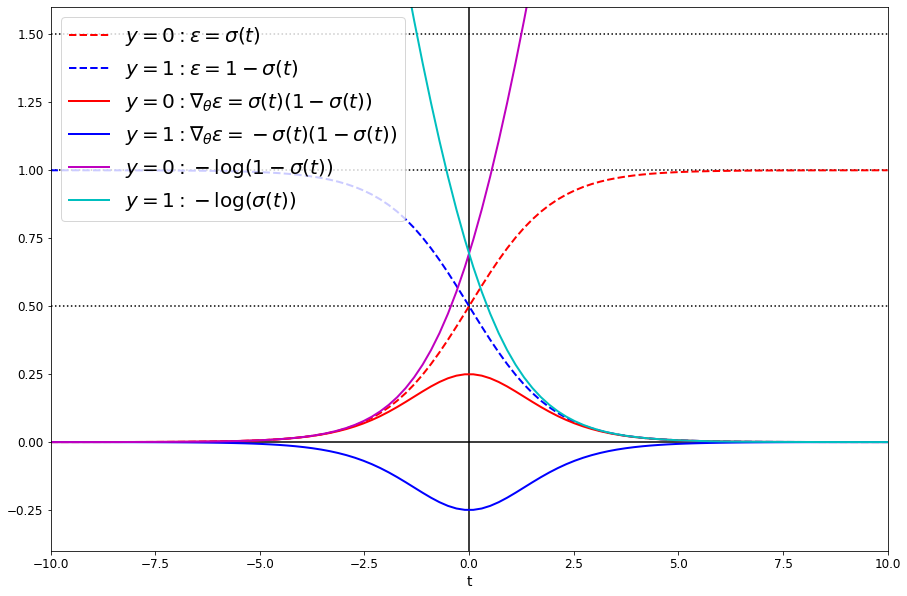

In [4]:
plot_sigmoid_gradients()

### (bstudent) A better loss / cost function for logistic fit

***(TODO: check veracity that this is an apples-to-apples example of author's observation)*** This is the type of case that agerion talked about earlier in the chapter, where the evaluation for training is not the evaluation used at test / runtime.  

Instead of the actual error $\epsilon_i(t)$ for sample $i$, consider a cost / loss function with better properties, e.g. at extreme values of $t$.

Note that I use $s(t)$ where ageron uses $\sigma(t)$ ...

$c(\theta) =
\begin{cases}
    &-\log(1 - s(t_i)) &\text{if } y_i = 0\\
        &-\log(s(t_i)) &\text{if } y_i = 1
\end{cases}$

$=(1-y_i)(-\log(1 - s(t_i))) + y_i(-\log(s(t_i)))$  

Where:  

$t_i=\mathbf X^T \theta$

And:

$s(t_i)=s(\mathbf X_i^T \theta)=\frac{1}{1+\exp(-t_i)}=\frac{1}{1+\exp(-\mathbf X_i^T \theta)}$

And:  

$-\log(s(t_i))=\log(1+\exp(-t_i))$  

$-\log(1 - s(t_i))=-\log(s(-t_i))=\log(1+\exp(t_i))$

$\therefore c(\theta) = (1-y_i)\log(1+\exp(t_i)) + y_i\log(1+\exp(-t_i))$  
  
$= (1-y_i)\log(1+\exp(X^T\theta)) + y_i\log(1+\exp(-X^T\theta))$  

Gradient:  

$\nabla_\theta c(\theta) = (1-y_i) s(\mathbf{x}_i^T\theta) \mathbf{x}_i - y_i s(-\mathbf{x}_i^T \theta) \mathbf{x}_i$

$= \left[(1-y_i) s(\mathbf{x}_i^T\theta) - y_i (1 - s(\mathbf{x}_i^T \theta)) \right] \mathbf{x}_i$  
$= \left[(1-y_i) s(t_i) - y_i (1 - s(t_i))\right] \mathbf{x}_i$  
$= \left[ s(t_i) - y_i s(t_i) - y_i + y_i s(t_i) \right] \mathbf{x}_i$  
$= \left[ s(t_i) - y_i \right] \mathbf{x}_i$  
$= \left[ s(\mathbf{x}_i^T\theta) - y_i \right] \mathbf{x}_i$  

This is in line with the result of eq 4-18 in the book, which shows element-wise derivative.  
Strangely, the e-book typesetting sucks for this textbook, but that doesn't matter because ageron provides all equations in $\LaTeX$ format, see:   
`book_equations.ipynb`  

### Summary of logistic regression cost function & gradient:

$c(\theta) =
\begin{cases}
    &-\log(1 - s(t_i)) &\text{if } y_i = 0\\
        &-\log(s(t_i)) &\text{if } y_i = 1
\end{cases}$

$=(1-y_i)(-\log(1 - s(t_i))) + y_i(-\log(s(t_i)))$  

Where:  

$t_i=\mathbf X^T \theta$

Gradient:  

$\nabla_\theta c(\theta) = (1-y_i) s(\mathbf{x}_i^T\theta) \mathbf{x}_i - y_i s(-\mathbf{x}_i^T \theta) \mathbf{x}_i$

$= \left[(1-y_i) s(\mathbf{x}_i^T\theta) - y_i (1 - s(\mathbf{x}_i^T \theta)) \right] \mathbf{x}_i$  
$= \left[(1-y_i) s(t_i) - y_i (1 - s(t_i))\right] \mathbf{x}_i$  
$= \left[ s(\mathbf{x}_i^T\theta) - y_i \right] \mathbf{x}_i$  

  --


### Eq **4-22** extends the above idea of log cost to multi-class loss:

*reproduced here from `book_equations.ipynb`:*  

**Equation 4-22: Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**Cross entropy between two discrete probability distributions $p$ and $q$ (page 141):**
$ H(p, q) = -\sum\limits_{x}p(x) \log q(x) $
*  
#### Eq **4-23**  gives the corresponding *gradient*  

*Equation 4-23: Cross entropy gradient vector for class $k$:  
$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$


## MISC

### demo np.c_

Shows that c has the nice property of turning vectors into columns, i.e. my intuitive bias was that the 0'th list element might need to have more than one dimension for this to work, but that is not the case!  

In [5]:
ones1 = np.ones((5,))
ones2 = 2*np.ones((5,))
ones3 = 3*np.ones((5,))

In [6]:
np.c_[ones1, ones2, ones3]

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

#### also demo np.r_

This result is counterintuitive, given the way np.c_ works above; IT is probably consistent in some way that would not elude a person smarter or more insightful than myself.

In [7]:
np.r_[ones1, ones2, ones3]

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.])

In [8]:
ones1T = ones1.reshape((1,5))
ones1T

array([[1., 1., 1., 1., 1.]])

In [9]:
# np.r_[ones1T, ones2, ones3]

## Q: what happens when you call `list(...)` with a `dataframe` argument?

In [10]:
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': list('uvwxy'), 'c': [5,10,15,20,25]})
df

,a,b,c
0,1,u,5
1,2,v,10
2,3,w,15
3,4,x,20
4,5,y,25


#### A: you get a list of the column names

In [11]:
list(df)

['a', 'b', 'c']

dict(...) on a data frame returns a dict of series:

In [12]:
dict(df)

{'a': 0    1
 1    2
 2    3
 3    4
 4    5
 Name: a, dtype: int64, 'b': 0    u
 1    v
 2    w
 3    x
 4    y
 Name: b, dtype: object, 'c': 0     5
 1    10
 2    15
 3    20
 4    25
 Name: c, dtype: int64}

In [13]:
type((dict(df)['a']))

pandas.core.series.Series

In [14]:
tups = list(zip(list(range(10)), np.array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703, 
                        9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]]).flatten()))
tups

[(0, 2.81585438),
 (1, 7.09167958),
 (2, 3.82972099),
 (3, 0.79365551),
 (4, 5.8885703),
 (5, 9.29718395),
 (6, 1.79862509),
 (7, 8.10392157),
 (8, -0.228207),
 (9, 4.83753243)]

Full derivation of sigmoid error gradient:

$\nabla_\theta \epsilon = \nabla_\theta y_i(1 - s(t)) + (1 - y_i)s(t)$  
$\dots = \left[ y_i(-s(t)(1-s(t))) + (1 - y_i)s(t)(1-s(t)) \right] \nabla_\theta t$  
$\dots = \left[ y_i s(t) ( s(t) - 1 ) + (1 - y_i) s(t)(1-s(t)) \right] \nabla_\theta t$
$\dots = \left[ y_i s(t)s(t) - y_i s(t) +  s(t)(1-s(t)) - y_i s(t)(1-s(t)) \right] \nabla_\theta t$
$\dots = \left[ y_i s(t)^2 - y_i s(t) +  s(t) - s(t))^2 - y_i s(t) + y_i s(t)^2 \right] \nabla_\theta t$  
$\dots = \left[ 2 y_i (s(t)^2 - s(t)) +  (s(t) - s(t))^2) \right] \nabla_\theta t$  
$\dots = \left[ (2 y_i -1) (s(t)^2 - s(t)) \right] \nabla_\theta t$  
$\dots = \left[ (1 - 2 y_i) s(t)(1 - s(t)) \right] \nabla_\theta t$  
$\dots = 
\begin{cases}
    &s(t)(1 - s(t)) \nabla_\theta t  & \text{if } y_i = 0\\
    &-s(t)(1 - s(t)) \nabla_\theta t &\text{if } y_i = 1
\end{cases}$


Scratch:

d/dx(a log(1 + exp(b x))) = (a b e^(b x))/(e^(b x) + 1)

del(theta) (1-y) log(1+exp(x^T theta)) = (1-y) x exp(x^T theta)/(1+exp(x^T theta)) = (1-y) x s(x^T theta)

d/dx(c log(1 + exp(-b x))) = -(b c)/(e^(b x) + 1)

del(theta) y log(1+exp(-x^T theta)) = -y x s(-x^T theta)


### Counter

In [15]:
import numpy as np
from collections import Counter

In [16]:
cr = Counter(np.random.randint(0,10,50))

In [17]:
for key,val in cr.items():
    print(key, val)

0 7
2 7
5 4
8 6
7 5
4 6
1 6
6 3
9 3
3 3


In [18]:
for key in sorted(cr.keys()):
    print(key, cr[key])

0 7
1 6
2 7
3 3
4 6
5 4
6 3
7 5
8 6
9 3


In [19]:
# dir()

In [20]:
!python --version

Python 3.6.10 :: Anaconda, Inc.


### The adventures of default dict

In [21]:
from collections import defaultdict as DD

dd = DD(lambda: None)
d  = dict()

#### Add new keys for d and dd:

In [22]:
dd["foo"] = 342 # 342 looks kinda like BAR

In [23]:
d["foo"] = 342

In [24]:
d

{'foo': 342}

In [25]:
dd

defaultdict(<function __main__.<lambda>()>, {'foo': 342})

#### Access non-existent (novel) keys for d and dd:

In [26]:
dd["bar"]    # no error

In [27]:
d["bar"]     # KeyError

KeyError: 'bar'

#### Accessing dd["bar"]  threw no error but had the side effect of creating key "bar" with value None:

In [28]:
dd

defaultdict(<function __main__.<lambda>()>, {'foo': 342, 'bar': None})

In [29]:
d

{'foo': 342}

In [30]:
len(str(hash('floorwax')))

19

In [31]:
hash('dessert topping')

-2566944883205829009

## Tensorflow Tests

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -q -U tensorflow-addons
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "nlp"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [34]:
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch,
# input_length).
# the largest integer (i.e. word index) in the input should be no larger
# than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch
# dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

In [35]:
output_array[0,:,:].T.round(2)

array([[-0.03, -0.03, -0.02, -0.01, -0.05,  0.02, -0.  , -0.04, -0.02,
         0.01],
       [-0.02, -0.03, -0.01,  0.03,  0.02,  0.02, -0.  ,  0.01,  0.04,
         0.04],
       [-0.01, -0.03,  0.04, -0.  ,  0.02,  0.03,  0.05,  0.01,  0.01,
         0.  ],
       [-0.05, -0.05, -0.02,  0.01,  0.04, -0.01, -0.03,  0.03, -0.05,
        -0.01],
       [ 0.01,  0.  , -0.03,  0.04, -0.05,  0.04, -0.03, -0.03, -0.01,
         0.03],
       [ 0.  , -0.05, -0.04, -0.01,  0.01,  0.02, -0.05, -0.04, -0.03,
        -0.04],
       [ 0.03,  0.04, -0.01,  0.04, -0.03,  0.04, -0.03, -0.03, -0.04,
         0.05],
       [ 0.02, -0.01, -0.01,  0.04, -0.01, -0.05, -0.01, -0.01, -0.01,
        -0.05],
       [ 0.01, -0.02,  0.02,  0.02,  0.04,  0.02, -0.03,  0.01,  0.03,
         0.03],
       [-0.01,  0.04,  0.02, -0.05, -0.04,  0.03, -0.05,  0.04, -0.02,
         0.03],
       [ 0.01, -0.02, -0.04,  0.01,  0.01,  0.01, -0.04, -0.05, -0.01,
        -0.05],
       [ 0.02, -0.01,  0.04,  0.  ,  0.04, 

#### Chained Comparison

In [36]:
yyy = 15
0 <= yyy <= 25

True

In [37]:
yyy = 335
0 <= yyy <= 25

False

In [38]:
yyy = 335
(0 <= yyy) <= 25

True